In [19]:
import tensorflow as tf
import keras
import tensorflow.keras.preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Conv2D, LayerNormalization,Dropout, Flatten, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D

In [27]:
x, y ,batch_size = 32,32,64
train_data_dir = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train"
test_dir = "/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test"

In [25]:
training_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_data_dir,
	target_size=(x,y),
	class_mode='binary',
    batch_size=batch_size,
    subset = "training"
)

validation_generator = training_datagen.flow_from_directory(
	train_data_dir,
	target_size=(x,y),
	class_mode='binary',
    batch_size=batch_size,
    subset = "validation"
)


test_generator = test_datagen.flow_from_directory(
	test_dir,
	target_size=(x,y),
	class_mode='categorical',
    batch_size=64
)

Found 70000 images belonging to 2 classes.
Found 30000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [37]:
from tensorflow.keras.layers import RandomContrast, RandomZoom, RandomFlip, RandomRotation
model = tf.keras.models.Sequential()

data_augmentation = tf.keras.models.Sequential([
    RandomZoom(0.1),
    RandomContrast(0.2),
])
model.add(Input((32,32,3)))

model.add(data_augmentation)

model.add(Conv2D(16, (3,3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,697 (2.02 MB)

 Trainable params: 529,601 (2.02 MB)

 Non-trainable params: 96 (384.00 B)

In [38]:
EPOCH = 10
SAVE_PATH = "/kaggle/working/modelflattenregulized.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_acc',patience=4,restore_best_weights=True, min_delta=0.05)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(SAVE_PATH, monitor="val_acc", save_best_only=True, verbose=1)

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['acc'])

In [40]:
history = model.fit(train_generator ,epochs=EPOCH, callbacks=[early_stop,checkpoint_cb],validation_data=validation_generator)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.8024 - loss: 0.4858
Epoch 1: val_acc improved from -inf to 0.68207, saving model to /kaggle/working/modelflattenregulized.h5
274/274 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - acc: 0.8025 - loss: 0.4854 - val_acc: 0.6821 - val_loss: 1.1273
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - acc: 0.8972 - loss: 0.2730
Epoch 2: val_acc improved from 0.68207 to 0.91477, saving model to /kaggle/working/modelflattenregulized.h5
274/274 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - acc: 0.8972 - loss: 0.2730 - val_acc: 0.9148 - val_loss: 0.2441
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - acc: 0.9154 - loss: 0.2328
Epoch 3: val_acc improved from 0.91477 to 0.92263, saving model to /kaggle/working/modelflattenregulized.h5
274/274 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - acc: 0.9154 - loss: 0.2328 - val_acc: 0.9226 - val_loss: 0.2185
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - acc: 0.9243 - loss: 0.2111
Epoch 4: val_acc improved 

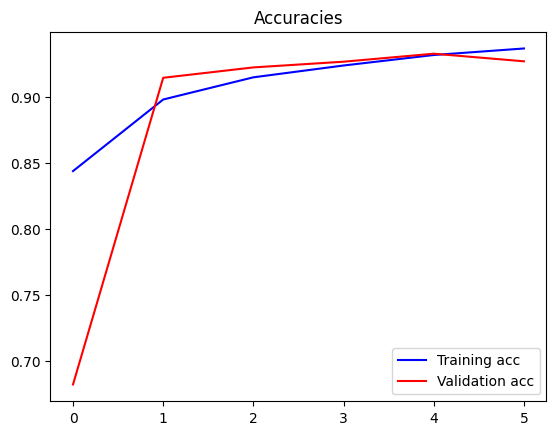

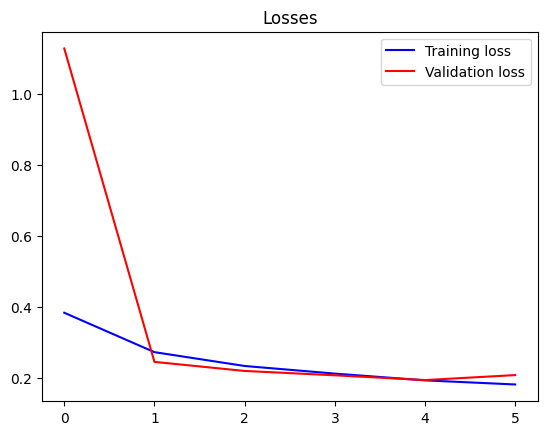

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b',val_acc,'r')
plt.title('Accuracies')
plt.legend(['Training acc','Validation acc'])
plt.figure()

plt.plot(epochs, loss, 'b',val_loss,'r')
plt.title('Losses')
plt.legend(['Training loss','Validation loss'])

plt.show()

In [42]:
model = tf.keras.models.load_model("/kaggle/working/modelflattenregulized.h5")
model.evaluate(validation_generator)

118/118 ━━━━━━━━━━━━━━━━━━━━ 76s 636ms/step - acc: 0.9341 - loss: 0.1915


[0.19284576177597046, 0.9330333471298218]